<a href="https://colab.research.google.com/github/iMshivam25/Voice-to-text/blob/main/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install sounddevice
# !pip install scipy
# !pip install setuptools
# !pip install --upgrade pip setuptools wheel
# !pip install cffi
# !pip install pyaudio

In [ ]:
# import sounddevice as sd
# from scipy.io.wavfile import write

In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116
!pip install git+https://github.com/openai/whisper.git 
!pip install diffusers==0.2.4
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"
!apt install ffmpeg
!pip install accelerate 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-xm8p9kn_
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-xm8p9kn_
  Resolved https://github.com/openai/whisper.git to commit 248b6cb124225dd263bb9bd32d060b6517e067f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done


In [ ]:
from google.colab import output
from huggingface_hub import notebook_login

output.enable_custom_widget_manager()
notebook_login()

In [12]:
import whisper

# loading model
model = whisper.load_model('small')

# loading audio file
audio = whisper.load_audio('prompt.m4a')
# padding audio to 30 seconds
audio = whisper.pad_or_trim(audio)

# generating spectrogram
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# decoding
options = whisper.DecodingOptions(fp16 = False)
result = whisper.decode(model, mel, options)

# ready prompt!
prompt = result.text

# adding tips
prompt += ' hd, 4k resolution, cartoon style'
print(prompt) 

I stood on a horse hd, 4k resolution, cartoon style


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
pip install diffusers --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 44.9 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.2.4
    Uninstalling diffusers-0.2.4:
      Successfully uninstalled diffusers-0.2.4


In [15]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4',
    revision='fp16',
    torcj_dtype=torch.float16,
    use_auth_token=True
)

pipe = pipe.to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Keyword arguments {'torcj_dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [16]:
with torch.autocast('cuda'):
    image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

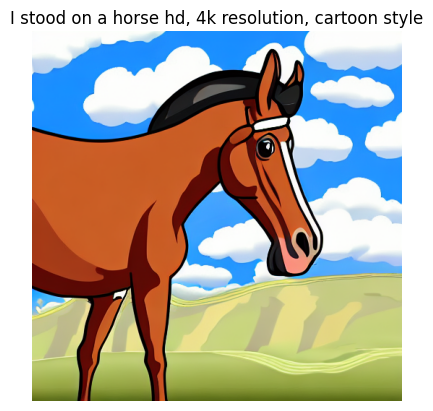

In [17]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(prompt)
plt.axis('off')
plt.savefig('result.jpg')
plt.show()